In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [6]:
conn = sqlite3.connect("../db.sqlite3")

query_order = "SELECT * FROM restaurant_order;"
df_order = pd.read_sql_query(query_order, conn)

query_orderitem = "SELECT * FROM restaurant_orderitem;"
df_orderitem = pd.read_sql_query(query_orderitem, conn)

query_product = "SELECT * FROM restaurant_product;"
df_product = pd.read_sql_query(query_product, conn)

combined_df = pd.merge(df_order, df_orderitem, left_on="id", right_on="order_id")
combined_df = pd.merge(combined_df, df_product, left_on="product_id", right_on="id")

combined_df.to_csv("combined_data.csv", index=False)

conn.close()

df = pd.read_csv("combined_data.csv")
print(df.head())
len(df)

   id_x             datetime  id_y  quantity  order_id  product_id   id  \
0     1  2019-08-03 20:25:00     1         2         1           6    6   
1     1  2019-08-03 20:25:00     2         1         1         240  240   
2     1  2019-08-03 20:25:00     3         1         1          19   19   
3     1  2019-08-03 20:25:00     4         1         1          36   36   
4     1  2019-08-03 20:25:00     5         1         1         111  111   

   price                 name  
0   0.80        Plain Papadum  
1  12.95     King Prawn Balti  
2   2.95          Garlic Naan  
3   3.95        Mushroom Rice  
4   8.95  Paneer Tikka Masala  


74818

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

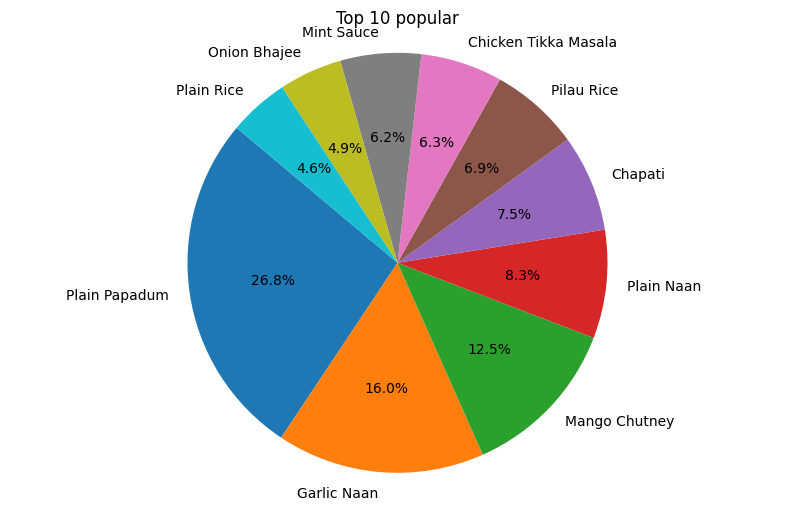

In [7]:
product_sales = df.groupby("product_id")["quantity"].sum()

top_10_products = product_sales.sort_values(ascending=False).head(10)

popularity_percentages = (top_10_products / top_10_products.sum()) * 100
product_names = df[df["id"].isin(top_10_products.index)]["name"].dropna().drop_duplicates()

plt.figure(figsize=(10, 6))
plt.pie(popularity_percentages, labels=product_names, autopct="%1.1f%%", startangle=140)
plt.title("Top 10 popular")
plt.axis("equal")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

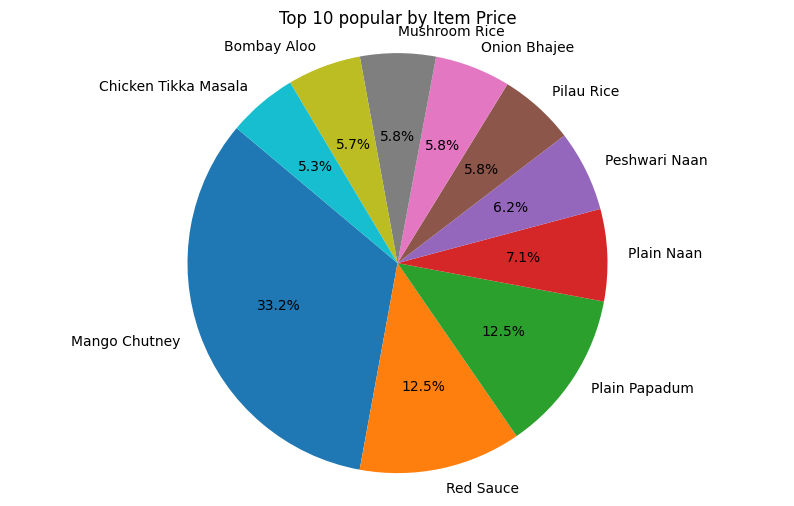

In [11]:
df["item_price"] = df["price"] * df["quantity"]

item_prices = df.groupby("product_id")["item_price"].sum()

df.to_csv("combined_data.csv", index=False)

top_10_items = item_prices.sort_values(ascending=False).head(10)

popularity_percentages = (top_10_items / top_10_items.sum()) * 100

product_names = df[df["id"].isin(top_10_items.index)]["name"].dropna().drop_duplicates()

plt.figure(figsize=(10, 6))
plt.pie(popularity_percentages, labels=product_names, autopct="%1.1f%%", startangle=140)
plt.title("Top 10 popular by Item Price")
plt.axis("equal")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

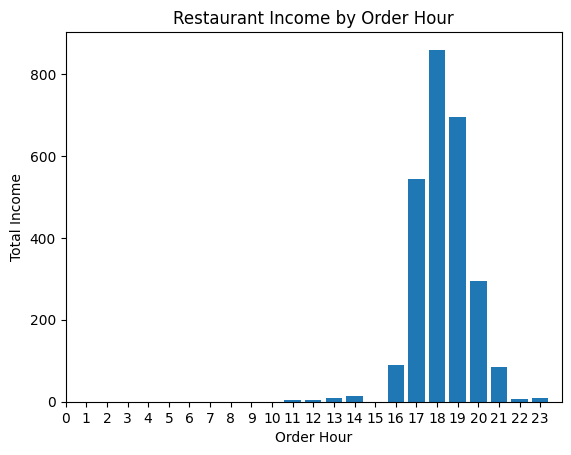

In [12]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order_hour"] = df["datetime"].dt.hour

hourly_income = df.groupby("order_hour")["item_price"].sum()

plt.bar(hourly_income.index, hourly_income.values)
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.title("Restaurant Income by Order Hour")
plt.xticks(range(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

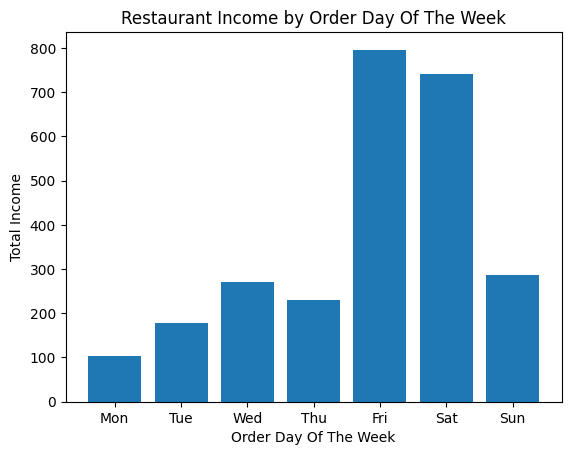

In [13]:
df["order_day_of_week"] = df["datetime"].dt.dayofweek

daily_income = df.groupby("order_day_of_week")["item_price"].sum()

plt.bar(daily_income.index, daily_income.values)
plt.xlabel("Order Day Of The Week")
plt.ylabel("Total Income")
plt.title("Restaurant Income by Order Day Of The Week")
plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()